# This code contains functions to perform linear regression with and without SKlearn. LAD regression and OLS regression are performed without SKlearn.

In [2]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

[36.  36.5 39.  38.  36.  35.5 36.  37.  55.3 37.5 39.  35.5 36.  36.
 34.  34.5 36.5 36.  35.  38.  39.5 39.5 36.  34.  35.5 36.  35.  34.5
 35.  33.5 37.  39.  37.  36.5 35.5 35.  35.  35.5 34.  36.  36.5 32.
 32.  35.5 34.  35. ]


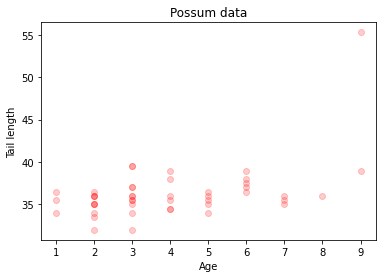

In [3]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')
age=possum_data.loc[:,'age'].values #x
tail=possum_data.loc[:,'tailL'].values #y
age=np.reshape(age,(-1,1))
possum_data.head()


# Make the scatter plot (don't forget the axis labels)
plt.scatter(age,tail, color = 'red',alpha=0.2)
plt.title('Possum data')
plt.xlabel('Age')
plt.ylabel('Tail length')
plt.show()


In [4]:
def linearModelPredict(b,X):
    yp=np.dot(X,b)
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
d=linearModelPredict(b,X)

#used to test b as a 2d array
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
bb=np.reshape(b,(-1,1))
yy=linearModelPredict(bb,X)


#report y
print("The predicted y value is: {} and the dimensionality of the returned numpy array is 1D.".format(d))

The predicted y value is: [ 0.1 -0.2  0.7] and the dimensionality of the returned numpy array is 1D.


In [5]:
def linearModelLossRSS(b,X,y):
    #predictions
    pred_y=linearModelPredict(b,X)
    #calc residuals
    r=np.subtract(y,pred_y)
    #calc Residual sum of squares
    rss=np.sum(np.square(r))
    #calc grad
    grad=-2*(np.dot(X.T,r))
    return (rss, grad)

#test data
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
v=linearModelLossRSS(b,X,y)
print('The Residual sum of squares (RSS) is {} and the gradient is {}.'.format(v[0],v[1]))

The Residual sum of squares (RSS) is 2.06 and the gradient is [-3.6 -4. ].


In [6]:
def linearModelFit(X,y,lossfcn):
    import scipy.optimize as so
    #initial location for optimizer
    bstart=[0,0]
    #optimizer
    result=so.minimize(lossfcn,bstart,args=(X,y), jac=True)
    #The estimated parameters
    estimated_betas=result.x
    #calculate total sum of squares
    tss=np.sum(np.square(np.subtract(y,np.mean(y))))
    #calc loss function
    (rss,grad)=lossfcn(estimated_betas,X,y)
    #calculate r2 value
    R2=1-((rss)/(tss))
    return (estimated_betas,R2)

#test data
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
z=linearModelFit(X,y,linearModelLossRSS)

print('The best parameters are {} and the fitted R2 is {} for the OLS test model.'.format(z[0],z[1]))

The best parameters are [0.6 0.6] and the fitted R2 is 0.75 for the OLS test model.


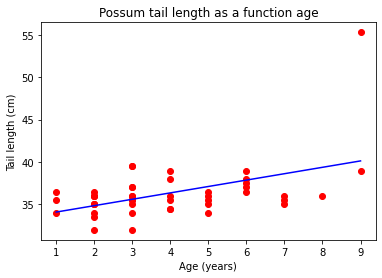

The R2 value is: 0.22286587947604097


In [7]:
# Make the design matrix using np.c_ 
y = tail
x = age
# xx concatenates age with col of 1's
xx=np.c_[np.ones(x.size),x]
#x_grid creates a 46x1 matrix. need to concatenate with column of 1's from 1-9.
x_grid=np.linspace(age.min(),age.max(),age.size)
#Xn concatenates col of 1's with xgrid
Xn=np.c_[np.ones(x_grid.size),x_grid]
# Call your fitting function 
(b1,R2)=linearModelFit(xx,y,linearModelLossRSS)

# Create the scatter plot (see question 1.1)
plt.scatter(age,tail, color = 'red')
plt.title('Possum tail length as a function age')
plt.xlabel('Age (years)')
plt.ylabel('Tail length (cm)')
#model predictions
y_p=linearModelPredict(b1,Xn)
plt.plot(x_grid,y_p,color='blue')
plt.show()

# Report R2 
print('The R2 value is: {}'.format(R2))

In [13]:
def linearModelLossLAD(b,X,y):
    predy=linearModelPredict(b,X)
    res = y-predy
    sres = np.sign(res); 
    sum_abs_dev = sum(abs(res))
    grad =- (np.dot(sres,X))
    return (sum_abs_dev,grad)

#test
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
(sum_abs_dev,grad)=linearModelLossLAD(b,X,y)
print('The loss is: {}, and the gradient is:{}'.format(sum_abs_dev, grad))

The loss is: 2.0, and the gradient is:[-1. -1.]


C:\Users\avand\miniconda3\envs\myEnv\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))
C:\Users\avand\miniconda3\envs\myEnv\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))


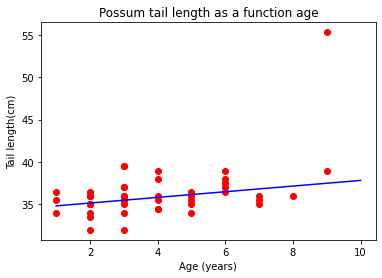

The R2 value is: 0.8518892557534495


In [14]:
# Make the design matrix using np.c_ 
y = possum_data.tailL.values
x = possum_data.age.values
# xx concatenates age with col of 1's
xx=np.c_[np.ones(x.size),x]
#x_grid creates a 46x1 matrix. need to concatenate with column of 1's from 1-9.
x_grid=np.linspace(age.min(),age.max()+1)
#Xn concatenates col of 1's with xgrid
Xn=np.c_[np.ones(x_grid.size),x_grid]
# Call your fitting function 
(bl,R2l)=linearModelFit(xx,y,linearModelLossLAD)

#predictiong function
yp1=linearModelPredict(bl,Xn)

# Create the scatter plot (see question 1.1)
plt.scatter(age,tail, color = 'red')
plt.title('Possum tail length as a function age')
plt.xlabel('Age (years)')
plt.ylabel('Tail length(cm)')
#prediction
plt.plot(x_grid,yp1,color='blue')
plt.show()

# Report R2 
print('The R2 value is: {}'.format(R2l))

The intercept is: 35.015527950310556
The coefficient (slope) is: [0.32919255]
The R2 value is: 0.15278063820922583
The R2 value is similar to the R2 value from the OLS model, which is expected since they are each ordinary least squares algorithms, but the LAD model has a larger r2 value, likely due to an error in the algorithm


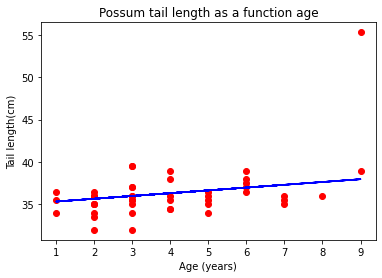

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

age=possum_data.loc[:,'age'].values #x
tail=possum_data.loc[:,'tailL'].values #y
age=np.reshape(age,(-1,1))

#regressor
regressor = linear_model.LinearRegression()
# Split the data into training/testing sets
#chose 72% test size because it retruned the highest r2 value.
(age_train, age_test, tail_train, tail_test) = train_test_split(age, tail, test_size = 0.72, random_state = 0)
regressor.fit(age_train, tail_train)
y_predict=regressor.predict(age_test)
#print intercept and coefficients
print('The intercept is: {}'.format(regressor.intercept_))
print('The coefficient (slope) is: {}'.format(regressor.coef_))
r2score=r2_score(tail_test, y_predict)
print('The R2 value is: {}'.format(r2score))

print('The R2 value is similar to the R2 value from the OLS model, which is expected since they are each ordinary least squares algorithms, but the LAD model has a larger r2 value, likely due to an error in the algorithm')
#plot
plt.scatter(age,tail, color = 'red')
plt.plot(age_test, y_predict, color = 'blue')
plt.title('Possum tail length as a function age')
plt.xlabel('Age (years)')
plt.ylabel('Tail length(cm)')
plt.show()